- run.ipynb 실행 이전에 pipeline.ipynb와 run.ipynb에서 데이터를 로드하는 path를 환경에 맞게 수정해야 함
- 본 코드에 pipeline.ipynb 파일을 py 형태로 변환하고 import 하는 코드가 포함되어 있음. (외부에서 py파일로 변환하여 업로드할 필요X)

## setting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 pip install catboost eli5 dash nbconvert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 54.5 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=8eea51334bed03e790b53196c6718c981395e01ae29ce83ff63ca850e34d2118
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
# 파일 저장 directory에 맞게 수정
%cd /content/drive/MyDrive/python/2024-1학기/MLOps/project/code/

/content/drive/MyDrive/python/2024-1학기/MLOps/project/code


In [4]:
!ls

 catboost_info		      mlops_catboost_pipeline.ipynb	     'pipeline(old).ipynb'
 dash_board.ipynb	      mlops_catboost_pipeline_new.ipynb       pipeline.py
 dash.ipynb		      mlops_ElasticNet_final_pipeline.ipynb   __pycache__
 ensemble_tuning.ipynb	      mlops_ensemble_pipeline.ipynb	      run.ipynb
 final_model_2011-11-30.pkl   mlops_pipeline.ipynb		      split_dataset.ipynb
 final_model_2011-12-07.pkl   mlops_xgb_pipeline.ipynb
 final_pipeline.ipynb	      pipeline.ipynb


In [5]:
# pipeline.ipynb 파일에서 df 데이터를 불러오는 경로를 본인의 환경에 맞게 수정 후 py로 convert
!jupyter nbconvert pipeline.ipynb --to python

[NbConvertApp] Converting notebook pipeline.ipynb to python
[NbConvertApp] Writing 57397 bytes to pipeline.py


In [6]:
import pipeline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import re
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
from dateutil.relativedelta import relativedelta
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
import pickle
from xgboost import XGBClassifier
from hyperopt.early_stop import no_progress_loss
from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')
import dash
from dash import dcc, html
import dash_table
import plotly.express as px
from dash.dependencies import Input, Output
warnings.filterwarnings('ignore')

In [8]:
# 실행 환경에 적합하게 경로 수정
path = '/content/drive/MyDrive/python/2024-1학기/MLOps/project/data/'
df = pd.read_csv(path+'data.csv', encoding= 'cp1252')

In [9]:
# lightgbm모델 parameter space
space = {'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
          'max_depth':  hp.choice('max_depth',np.arange(1, 30, 1, dtype=int)),
          'num_leaves': hp.choice('num_leaves',np.arange(10, 300, 10, dtype=int)),
          'min_child_weight': hp.choice('min_child_weight', np.arange(1, 20, 1, dtype=int)),
          'scale_pos_weight': hp.choice('scale_pos_weight',np.arange(1, 10, 1, dtype=int)),
          'lambda_l1': hp.uniform('lambda_l1', 0, 1),
          'colsample_bytree': hp.uniform('colsample_bytree',0.4,1)}

## 11월 30일 기준 모델 실행 및 시각화

### 모델 실행

--- 2011-08-02 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-02-03 00:00:00
valid 시작 시점 : 2011-04-05 00:00:00
valid 마지막 시점 : 2011-05-04 00:00:00


--- 2011-09-01 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-03-04 00:00:00
valid 시작 시점 : 2011-05-05 00:00:00
valid 마지막 시점 : 2011-06-03 00:00:00


--- 2011-10-01 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-04-04 00:00:00
valid 시작 시점 : 2011-06-05 00:00:00
valid 마지막 시점 : 2011-07-03 00:00:00


--- 2011-10-31 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-05-04 00:00:00
valid 시작 시점 : 2011-07-04 00:00:00
valid 마지막 시점 : 2011-08-02 00:00:00


Weighted averages of validation sets (recent folds weighted more):
Weighted Accuracy: 0.7192
Weighted AUC: 0.7256
Weighted F1-score: 0.6058
Weighted Precision: 0.5198




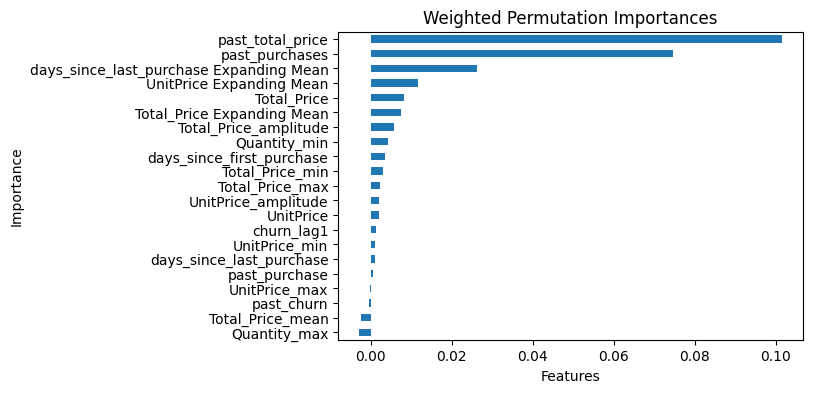



------Final weighted averages of validation sets with selected features (recent folds weighted more)------ 

Final Weighted Accuracy: 0.7008
Final Weighted AUC: 0.7445
Final Weighted F1-score: 0.6247
Final Weighted Precision: 0.4962



------Final weighted averages of validation sets with selected features and hyperparameters (recent folds weighted more)------ 

Final Weighted Accuracy: 0.7220
Final Weighted AUC: 0.7537
Final Weighted F1-score: 0.6364
Final Weighted Precision: 0.5177


---------Final Model Train---------


train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-06-03 00:00:00
test 시작 시점 : 2011-08-03 00:00:00
test 마지막 시점 : 2011-09-01 00:00:00
pred 시작 시점 : 2011-11-24 00:00:00
pred 마지막 시점 : 2011-11-30 00:00:00


Final Test Accuracy: 0.6949
Final Test AUC: 0.7506
Final Test F1-score: 0.5637
Final Test Precision: 0.4207
--- 2011-08-02 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-02-03 00:00:00
valid 시작 시점 : 2011-04-05 00:00:00
valid 마지막 시

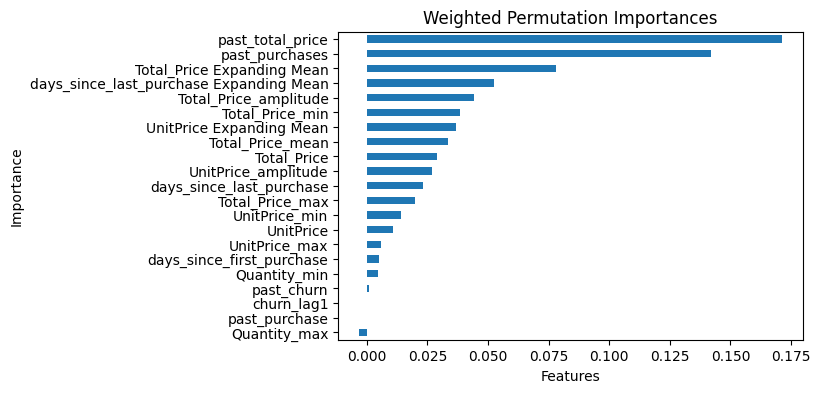



------Final weighted averages of validation sets with selected features (recent folds weighted more)------ 

Final Weighted Accuracy: 0.7372
Final Weighted AUC: 0.6821
Final Weighted F1-score: 0.5490
Final Weighted Precision: 0.5580



------Final weighted averages of validation sets with selected features and hyperparameters (recent folds weighted more)------ 

Final Weighted Accuracy: 0.7284
Final Weighted AUC: 0.7434
Final Weighted F1-score: 0.6267
Final Weighted Precision: 0.5279


---------Final Model Train---------


train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-06-03 00:00:00
test 시작 시점 : 2011-08-03 00:00:00
test 마지막 시점 : 2011-09-01 00:00:00
pred 시작 시점 : 2011-11-24 00:00:00
pred 마지막 시점 : 2011-11-30 00:00:00


Final Accuracy: 0.7226
Final AUC: 0.7725
Final F1-score: 0.5900
Final Precision: 0.4477


In [10]:
# 파이프라인 setting & 실행
es = pipeline.EnsemblePipeline(now_timestamp='2011-11-30', space=space, churn_day=90, test_size=30, pred_size=7, foldnum=4, jump_day=30, hyperparameters = True)

In [11]:
# model fitting + parameter tuning
es.fit()

100%|██████████| 200/200 [00:14<00:00, 13.93trial/s, best loss: -0.6714285714285714]


In [12]:
# 하이퍼파라미터 정보
es.hyperparameters

{'colsample_bytree': 0.49723751340984007,
 'lambda_l1': 0.17735361523077878,
 'learning_rate': 0.014188721755084337,
 'max_depth': 18,
 'min_child_weight': 18,
 'num_leaves': 27,
 'scale_pos_weight': 6}

In [13]:
# 성능 검증
es.valid()

100%|██████████| 200/200 [00:13<00:00, 14.59trial/s, best loss: -0.6714285714285714]
Ensemble tuning score Accuracy: 0.7198
Ensemble tuning score AUC: 0.7730
Ensemble tuning score F1-score: 0.6154
Ensemble tuning score Precision: 0.4727


In [14]:
# 최종 예측(inference)
es.predict()

,InvoiceDate,CustomerID,Churn
0,2011-11-24,14277.0,0.524489
1,2011-11-24,17096.0,0.635580
2,2011-11-24,14709.0,0.106870
3,2011-11-24,16989.0,0.629561
4,2011-11-24,13207.0,0.667240
...,...,...,...
507,2011-11-30,16910.0,0.458839
508,2011-11-30,14893.0,0.714838
509,2011-11-30,14911.0,0.079858
510,2011-11-30,14540.0,0.680635


### dash  시각화

**이탈 확률 70% 이상인 고객은 핑크색으로 강조**

In [16]:
predictions = es.output.copy()
predictions['InvoiceDate'] = pd.to_datetime(predictions['InvoiceDate']).dt.strftime('%Y-%m-%d')
churn_predictions = predictions[predictions['Churn'] > 0.5] # 이탈로 예측된 고객

start_date = churn_predictions['InvoiceDate'].min()
end_date = churn_predictions['InvoiceDate'].max()
title = f'{start_date} ~ {end_date} 이탈 고객'

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(title, style={'textAlign': 'center'}),
    dash_table.DataTable(
        id='churn-table',
        columns=[
            {'name': 'InvoiceDate', 'id': 'InvoiceDate'},
            {'name': 'CustomerID', 'id': 'CustomerID'},
            {'name': 'Churn probability', 'id': 'Churn'}
        ],
        data=churn_predictions.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left'},
        style_data_conditional=[
            {
                'if': {'filter_query': '{Churn} >= 0.7'},
                'backgroundColor': 'pink',
                'color': 'black',
            }
        ]
    )
], style={'display': 'white'})

if __name__ == '__main__':
    app.run_server(host='0.0.0.0', port=9101)

<IPython.core.display.Javascript object>

In [17]:
# 고객 정보 데이터
preprocessed_data = es.preprocess_nodrop_pipeline()
preprocessed_data['InvoiceDate'] = pd.to_datetime(preprocessed_data['InvoiceDate']).dt.strftime('%Y-%m-%d')
churn_customer_data = preprocessed_data[preprocessed_data['CustomerID'].isin(churn_predictions['CustomerID'])]
churn_customer_data = churn_customer_data.drop('Churn', axis = 1)
churn_customer_data['CustomerID'] = churn_customer_data['CustomerID'].astype(str).str.replace('.0', '')
churn_customer_data = churn_customer_data.sort_values(by='InvoiceDate')

# 예측 날짜 설정
start_date = churn_predictions['InvoiceDate'].min()
end_date = churn_predictions['InvoiceDate'].max()
title = f'{start_date} ~ {end_date} 이탈 예측 고객의 정보'


app = dash.Dash(__name__)

columns = [{'name': col, 'id': col} for col in churn_customer_data.columns]

app.layout = html.Div(children=[
    html.H1(title, style={'textAlign': 'center'}),
    dash_table.DataTable(
        id='churn-table',
        columns=columns,
        data=churn_customer_data.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left'},

    ),
    html.H2('Filtered Customer Data', style={'textAlign': 'center'}),
    dash_table.DataTable(
        id='customer-data-table',
        columns=columns,
        data=churn_customer_data.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left'}
    ),
    html.H2('Customer Data Visualizations', style={'textAlign': 'center'}),
], style={'display': 'white'})

if __name__ == '__main__':
    app.run_server(host='0.0.0.0', port=9101, mode='external')

<IPython.core.display.Javascript object>

In [18]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1('이탈 예측 고객 정보 검색', style={'textAlign': 'center'}),

    # 고객 ID 입력 칸 생성
    dcc.Input(id='customer-id-input', type='text', placeholder='고객의 CustomerID', style={'width': '50%', 'margin': '20px auto', 'textAlign': 'center'}),

    html.Div(id='customer-search-results')
])

@app.callback(
    Output('customer-search-results', 'children'),
    [Input('customer-id-input', 'value')]
)
def update_customer_search_results(customer_id):
    if not customer_id:
        return html.Div('고객의 CustomerID를 입력', style={'textAlign': 'center', 'margin': '20px'})

    customer_data = churn_customer_data[churn_customer_data['CustomerID'] == customer_id]

    if customer_data.empty:
        return html.Div(f'CustomerID {customer_id}에 대한 정보를 찾을 수 없습니다.', style={'textAlign': 'center', 'margin': '20px'})

    customer_data = customer_data[['CustomerID', 'InvoiceDate', 'Total_Price', 'past_churns']]
    customer_data = customer_data.sort_values(by='InvoiceDate')

    table = dash_table.DataTable(
        id='customer-table',
        columns=[{'name': col, 'id': col} for col in customer_data.columns],
        data=customer_data.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left'}
    )

    return table

if __name__ == '__main__':
    app.run_server(host='0.0.0.0', port=9101, mode='external')


<IPython.core.display.Javascript object>

## 12월 7일 데이터 갱신 가정 (재학습)

--- 2011-08-09 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-02-10 00:00:00
valid 시작 시점 : 2011-04-12 00:00:00
valid 마지막 시점 : 2011-05-11 00:00:00


--- 2011-09-08 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-03-11 00:00:00
valid 시작 시점 : 2011-05-12 00:00:00
valid 마지막 시점 : 2011-06-10 00:00:00


--- 2011-10-08 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-04-11 00:00:00
valid 시작 시점 : 2011-06-12 00:00:00
valid 마지막 시점 : 2011-07-10 00:00:00


--- 2011-11-07 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-05-11 00:00:00
valid 시작 시점 : 2011-07-11 00:00:00
valid 마지막 시점 : 2011-08-09 00:00:00


Weighted averages of validation sets (recent folds weighted more):
Weighted Accuracy: 0.7211
Weighted AUC: 0.7305
Weighted F1-score: 0.6019
Weighted Precision: 0.5098




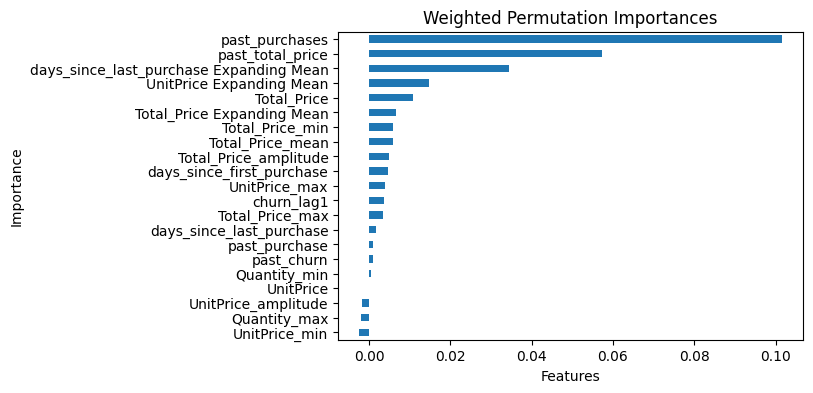



------Final weighted averages of validation sets with selected features (recent folds weighted more)------ 

Final Weighted Accuracy: 0.6993
Final Weighted AUC: 0.7489
Final Weighted F1-score: 0.6175
Final Weighted Precision: 0.4868



------Final weighted averages of validation sets with selected features and hyperparameters (recent folds weighted more)------ 

Final Weighted Accuracy: 0.7058
Final Weighted AUC: 0.7497
Final Weighted F1-score: 0.6195
Final Weighted Precision: 0.4913


---------Final Model Train---------


train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-06-10 00:00:00
test 시작 시점 : 2011-08-10 00:00:00
test 마지막 시점 : 2011-09-08 00:00:00
pred 시작 시점 : 2011-12-01 00:00:00
pred 마지막 시점 : 2011-12-07 00:00:00


Final Test Accuracy: 0.6726
Final Test AUC: 0.7527
Final Test F1-score: 0.5561
Final Test Precision: 0.4023
--- 2011-08-09 fold----------------------
train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-02-10 00:00:00
valid 시작 시점 : 2011-04-12 00:00:00
valid 마지막 시

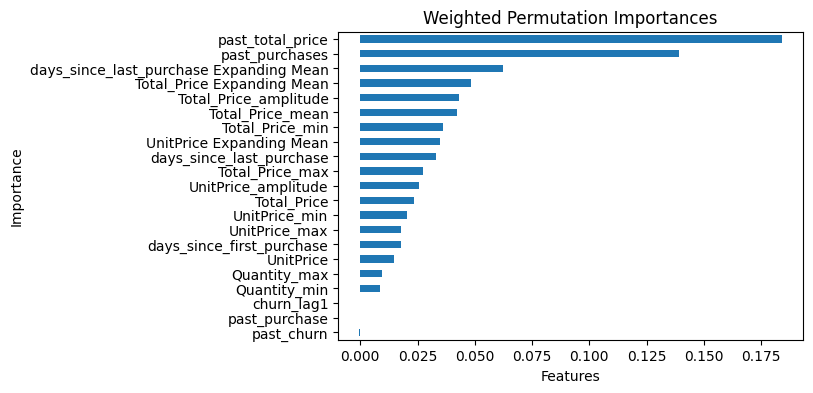



------Final weighted averages of validation sets with selected features (recent folds weighted more)------ 

Final Weighted Accuracy: 0.7325
Final Weighted AUC: 0.6679
Final Weighted F1-score: 0.5187
Final Weighted Precision: 0.5355



------Final weighted averages of validation sets with selected features and hyperparameters (recent folds weighted more)------ 

Final Weighted Accuracy: 0.7240
Final Weighted AUC: 0.7375
Final Weighted F1-score: 0.6097
Final Weighted Precision: 0.5135


---------Final Model Train---------


train 시작 시점 : 2010-12-01 00:00:00
train 마지막 시점 : 2011-06-10 00:00:00
test 시작 시점 : 2011-08-10 00:00:00
test 마지막 시점 : 2011-09-08 00:00:00
pred 시작 시점 : 2011-12-01 00:00:00
pred 마지막 시점 : 2011-12-07 00:00:00


Final Accuracy: 0.6954
Final AUC: 0.7610
Final F1-score: 0.5687
Final Precision: 0.4198


In [19]:
# 11월 30일 -> 12월 7일자로 현재 시점 이동(데이터 갱신)
new = pipeline.EnsemblePipeline(now_timestamp='2011-12-07', space=space, churn_day=90, test_size=30, pred_size=7, foldnum=4, jump_day=30, hyperparameters = False)

In [20]:
# 11월 30일자 튜닝된 하이퍼파라미터 이전
new.hyperparameters = es.hyperparameters.copy()

In [21]:
new.fit() #재학습

100%|██████████| 200/200 [00:28<00:00,  6.93trial/s, best loss: -0.5511811023622047]


In [22]:
new.valid()

100%|██████████| 200/200 [00:18<00:00, 10.99trial/s, best loss: -0.5511811023622047]
Ensemble tuning score Accuracy: 0.7046
Ensemble tuning score AUC: 0.7634
Ensemble tuning score F1-score: 0.6154
Ensemble tuning score Precision: 0.4706


In [23]:
new.predict()

,InvoiceDate,CustomerID,Churn
0,2011-12-01,14243.0,0.081209
1,2011-12-01,13777.0,0.184339
2,2011-12-01,15187.0,0.184339
3,2011-12-01,16839.0,0.184339
4,2011-12-01,13854.0,0.184339
...,...,...,...
552,2011-12-07,14708.0,0.682018
553,2011-12-07,14769.0,0.163602
554,2011-12-07,14794.0,0.528775
555,2011-12-07,16525.0,0.184339
